# House price Prediction - Model build

In [194]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score, mean_squared_error

In [196]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor

In [197]:
# import the dataset
dataSet = pd.read_csv('hotelPriceCleaned.csv')

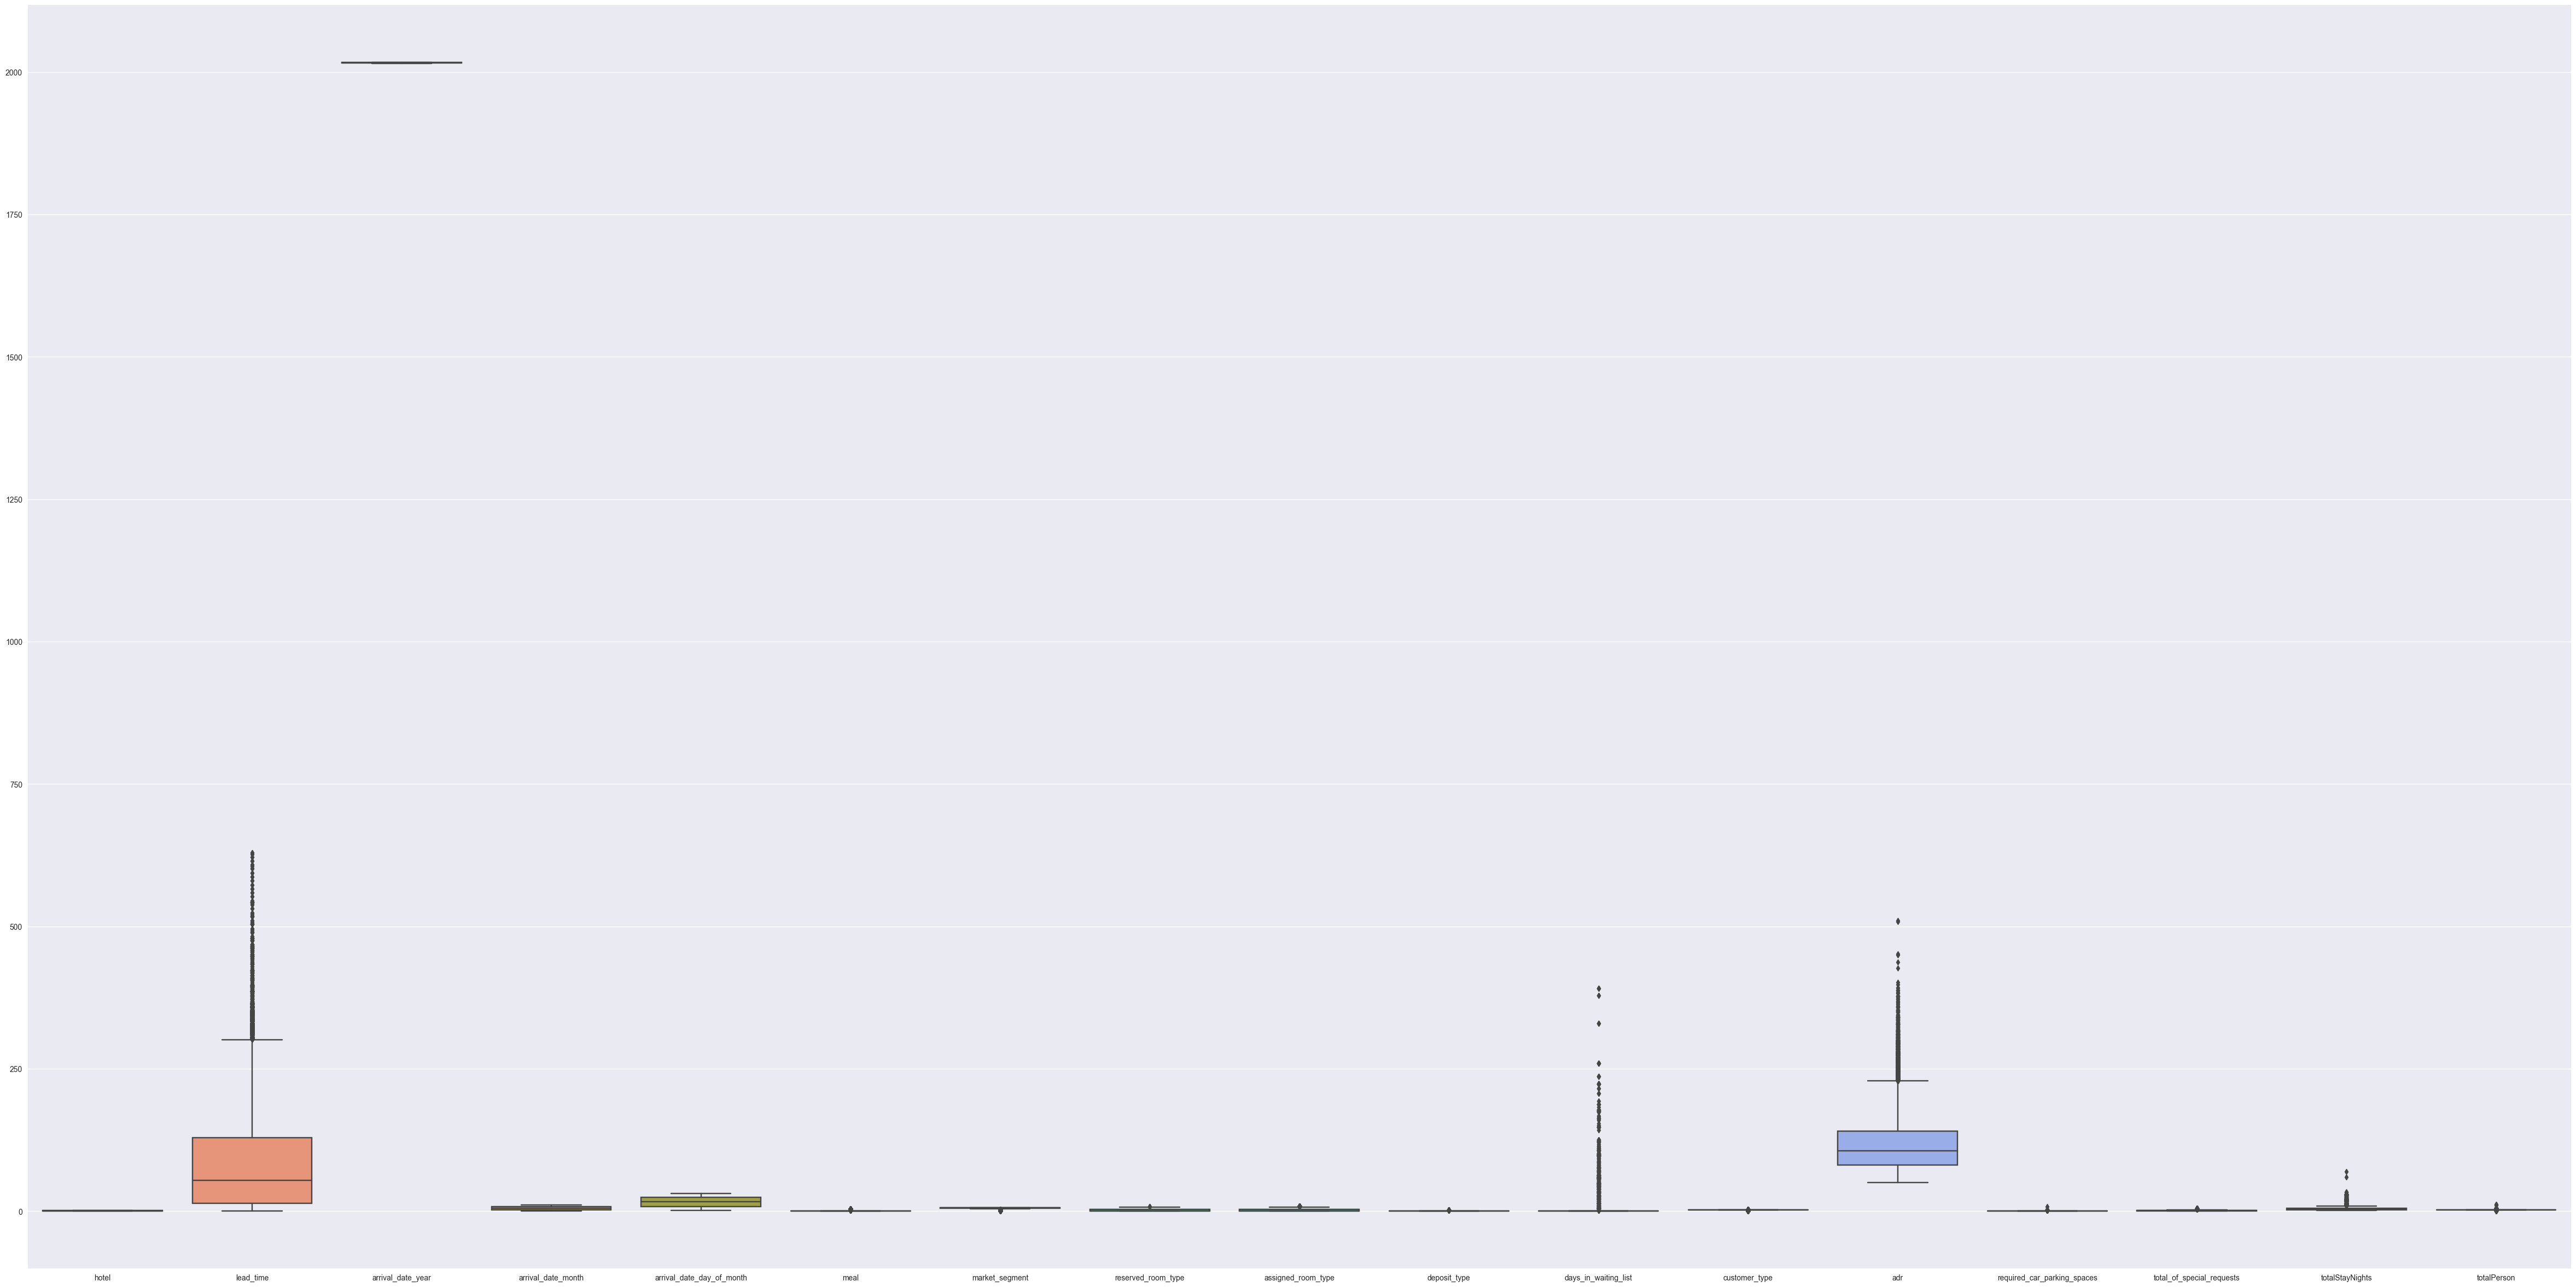

In [198]:
plt.figure(figsize=(60, 30))
sns.boxplot(dataSet)
plt.show()

    Basic information of the dataset

In [199]:
dataSet.shape

(74142, 17)

In [200]:
dataSet.isna().sum()

hotel                          0
lead_time                      0
arrival_date_year              0
arrival_date_month             0
arrival_date_day_of_month      0
meal                           0
market_segment                 0
reserved_room_type             0
assigned_room_type             0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
adr                            0
required_car_parking_spaces    0
total_of_special_requests      0
totalStayNights                0
totalPerson                    0
dtype: int64

In [201]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74142 entries, 0 to 74141
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        74142 non-null  int64  
 1   lead_time                    74142 non-null  int64  
 2   arrival_date_year            74142 non-null  int64  
 3   arrival_date_month           74142 non-null  int64  
 4   arrival_date_day_of_month    74142 non-null  int64  
 5   meal                         74142 non-null  int64  
 6   market_segment               74142 non-null  int64  
 7   reserved_room_type           74142 non-null  int64  
 8   assigned_room_type           74142 non-null  int64  
 9   deposit_type                 74142 non-null  int64  
 10  days_in_waiting_list         74142 non-null  int64  
 11  customer_type                74142 non-null  int64  
 12  adr                          74142 non-null  float64
 13  required_car_par

In [202]:
dataSet.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,meal,market_segment,reserved_room_type,assigned_room_type,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,totalStayNights,totalPerson
0,1,7,2015,5,1,0,3,0,2,0,0,2,75.0,0,0,1,1.0
1,1,13,2015,5,1,0,2,0,0,0,0,2,75.0,0,0,1,1.0
2,1,14,2015,5,1,0,6,0,0,0,0,2,98.0,0,1,2,2.0
3,1,0,2015,5,1,0,3,2,2,0,0,2,107.0,0,0,2,2.0
4,1,9,2015,5,1,1,3,2,2,0,0,2,103.0,0,1,2,2.0


In [203]:
# Change the data to StandardScaler with the range of 0 to 1.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dataSet)
dataSet = pd.DataFrame(scaler.transform(dataSet), columns=dataSet.columns)

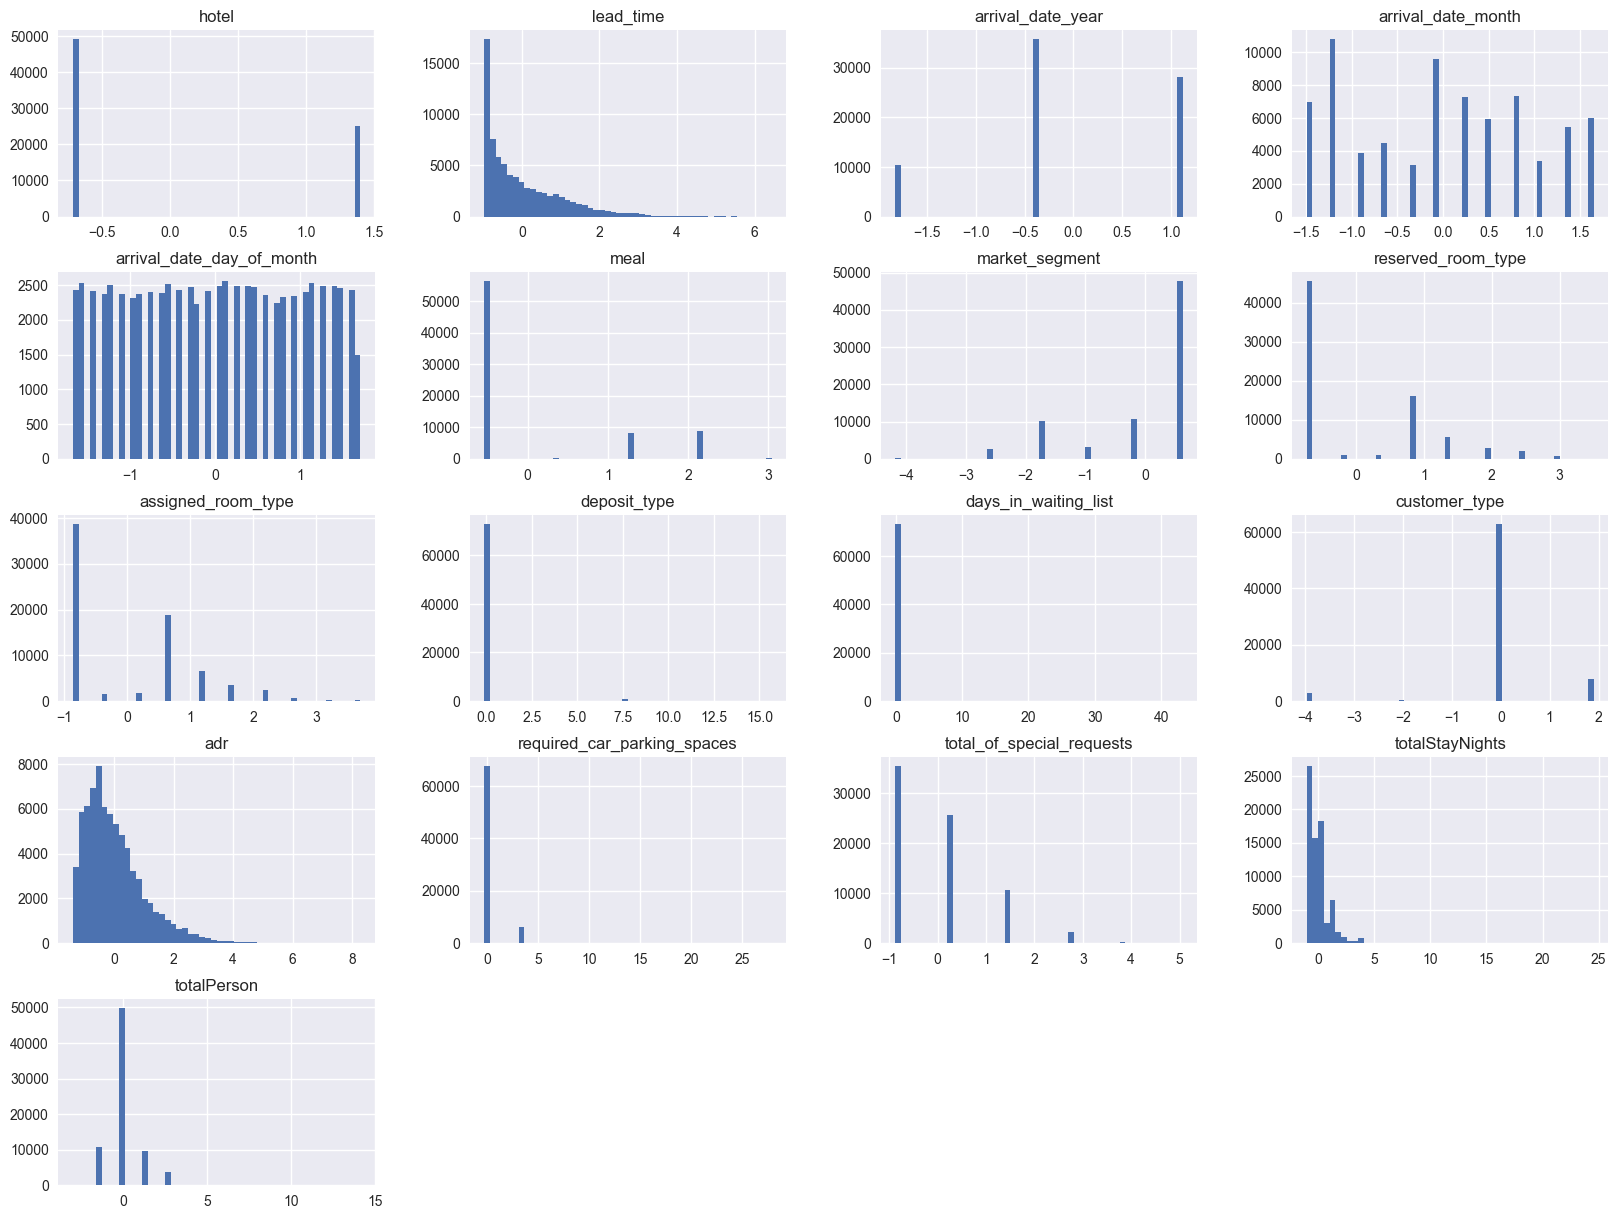

In [204]:
plt.style.use('seaborn')
dataSet.hist(bins=50,figsize=(20,15))
plt.show()

In [205]:
# Split the independent and dependent feature
independent = dataSet.drop(columns='adr')
dependent = dataSet[['adr']]

In [206]:
independent.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,meal,market_segment,reserved_room_type,assigned_room_type,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,totalStayNights,totalPerson
0,1.400294,-0.888574,-1.82427,-0.062444,-1.674065,-0.544276,-1.772949,-0.735479,0.156552,-0.113241,-0.068754,-0.052593,-0.304349,-0.875107,-1.023153,-1.561893
1,1.400294,-0.817880,-1.82427,-0.062444,-1.674065,-0.544276,-2.574356,-0.735479,-0.855971,-0.113241,-0.068754,-0.052593,-0.304349,-0.875107,-1.023153,-1.561893
2,1.400294,-0.806098,-1.82427,-0.062444,-1.674065,-0.544276,0.631272,-0.735479,-0.855971,-0.113241,-0.068754,-0.052593,-0.304349,0.313625,-0.646426,-0.133739
3,1.400294,-0.971049,-1.82427,-0.062444,-1.674065,-0.544276,-1.772949,0.325249,0.156552,-0.113241,-0.068754,-0.052593,-0.304349,-0.875107,-0.646426,-0.133739
4,1.400294,-0.865009,-1.82427,-0.062444,-1.674065,0.352892,-1.772949,0.325249,0.156552,-0.113241,-0.068754,-0.052593,-0.304349,0.313625,-0.646426,-0.133739


In [207]:
dependent.head()

,adr
0,-0.876426
1,-0.876426
2,-0.391900
3,-0.202303
4,-0.286568


In [208]:
independent.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,meal,market_segment,reserved_room_type,assigned_room_type,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,totalStayNights,totalPerson
0,1.400294,-0.888574,-1.82427,-0.062444,-1.674065,-0.544276,-1.772949,-0.735479,0.156552,-0.113241,-0.068754,-0.052593,-0.304349,-0.875107,-1.023153,-1.561893
1,1.400294,-0.817880,-1.82427,-0.062444,-1.674065,-0.544276,-2.574356,-0.735479,-0.855971,-0.113241,-0.068754,-0.052593,-0.304349,-0.875107,-1.023153,-1.561893
2,1.400294,-0.806098,-1.82427,-0.062444,-1.674065,-0.544276,0.631272,-0.735479,-0.855971,-0.113241,-0.068754,-0.052593,-0.304349,0.313625,-0.646426,-0.133739
3,1.400294,-0.971049,-1.82427,-0.062444,-1.674065,-0.544276,-1.772949,0.325249,0.156552,-0.113241,-0.068754,-0.052593,-0.304349,-0.875107,-0.646426,-0.133739
4,1.400294,-0.865009,-1.82427,-0.062444,-1.674065,0.352892,-1.772949,0.325249,0.156552,-0.113241,-0.068754,-0.052593,-0.304349,0.313625,-0.646426,-0.133739


In [209]:
# split the train and test 
xTrain, xTest, yTrain, yTest = train_test_split(independent, dependent, test_size=0.30, random_state=42)

In [210]:
# algorithm
models={
    'Multiple Linear Regression':LinearRegression(n_jobs = -1),
    'Decision tree':DecisionTreeRegressor(),
    'Random forest':RandomForestRegressor(),
    'XGBoost':XGBRegressor(), 
    'AdaBoost':AdaBoostRegressor(),
    "GradientBoost":GradientBoostingRegressor(),
    "LightBoost":LGBMRegressor()
}

In [211]:
PredictScore = pd.DataFrame()
for modelName, model in models.items():
    regressor = model.fit(xTrain, yTrain)
    yPred = regressor.predict(xTest)
    # R2score
    PredictScore.loc[modelName, 'R2-score'] = r2_score(yPred, yTest)
    # Mse
    PredictScore.loc[modelName, 'MSE'] = mean_squared_error(yPred, yTest)

C:\Users\REVANTH KUMAR\Anaconda3\envs\hopeAi\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\REVANTH KUMAR\Anaconda3\envs\hopeAi\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\REVANTH KUMAR\Anaconda3\envs\hopeAi\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003468 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 486
[LightGBM] [Info] Number of data points in the train set: 51899, number of used features: 16
[LightGBM] [Info] Start training from score 0.001161


In [212]:
PredictScore

,R2-score,MSE
Multiple Linear Regression,-1.155602,0.683172
Decision tree,0.749371,0.251485
Random forest,0.838926,0.136716
XGBoost,0.835550,0.140596
AdaBoost,-2.118098,0.736529
GradientBoost,0.464936,0.284343
LightBoost,0.803017,0.152754


    Cross validation

In [239]:
CrossValScore = pd.DataFrame()
for modelName, model in models.items():
    scores = cross_val_score(model, independent, dependent, cv=5) 
    MSE = cross_val_score(XGBRegressor(), independent, dependent, cv= 5, scoring='neg_mean_squared_error')
    # R2score
    CrossValScore.loc[modelName, 'R2-score'] = scores.mean()
    # Mse
    CrossValScore.loc[modelName, 'MSE'] = MSE.mean()

C:\Users\REVANTH KUMAR\Anaconda3\envs\hopeAi\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\REVANTH KUMAR\Anaconda3\envs\hopeAi\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\REVANTH KUMAR\Anaconda3\envs\hopeAi\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\REVANTH KUMAR\Anaconda3\envs\hopeAi\lib\site-packages\sklearn

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005642 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 490
[LightGBM] [Info] Number of data points in the train set: 59313, number of used features: 16
[LightGBM] [Info] Start training from score 0.008900
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003728 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 480
[LightGBM] [Info] Number of data points in the train set: 59313, number of used features: 16
[LightGBM] [Info] Start training from score -0.000613
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough

In [240]:
CrossValScore

,R2-score,MSE
Multiple Linear Regression,0.295676,-0.197661
Decision tree,0.565193,-0.197661
Random forest,0.752553,-0.197661
XGBoost,0.787389,-0.197661
AdaBoost,0.097877,-0.197661
GradientBoost,0.646125,-0.197661
LightBoost,0.772014,-0.197661


 XGBoost is the good accuracy in the cross validation

In [242]:
# XGBoost check the overfitting or not 
regressor = XGBRegressor()
regressor.fit(xTrain, yTrain)
print('Accuracy Train', r2_score(yTrain, regressor.predict(xTrain)))
print('Accuracy Test', r2_score(yTest, regressor.predict(xTest)))

Accuracy Train 0.8865342270010647
Accuracy Test 0.8586909940394811


Finally, XGBoost is a good model for this condition problem